In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from sklearn import metrics
#pd.set_option('display.max_columns', None)

### Dataset Description - 

The CIC-Darknet2020 dataset, created by the Canadian Institute for Cybersecurity (CIC), is a comprehensive dataset created for research and development of methods for detecting and analyzing darknet traffic.


The dataset consists of both darknet and benign traffic. The first layer generates the traffic types - Tor, Non-Tor, VPN, NonVPN. The second layer of the darknet traffic consists of Audio-Streaming, Browsing, Chat, Email, P2P, File-Transfer, Video-Streaming, and VOIP. The CIC-Darknet2020 dataset provides a variety of features extracted from the network traffic data, such as average packet size, average packet length, Flow IAT Mean, Flag Counts - PSH, FIN, SYN etc., flow duration, source and destination IP addresses, source and destination ports, protocol types, and other relevant information.

The dataset includes two labels for each data point, one is from the first layer which represents the type of network flow and the other is from second layer representing the data that is being sent.


The Darknet dataset comprises a total of 141,530 records, including 118,611 benign samples and 22,919 darknet samples. The dataset has 85 features in total. 

### Exploratory Data Analysis -
*   The shape of the dataset is - (141530, 85). It means that the dataset has 141530 rows and 85 features.
*   RangeIndex: 141530 entries, 0 to 141529
*   All of the values have 141530 non-null values but Flow Bytes/s have 141483 non-null values meaning there are missing values in Flow Bytes/s column.
*   The datatypes are - int64(55), float64(24) and object(6). As a result of using 64 bit data type variables, the dataset is using up more memory.
*   We also see that 83.8% of the dataset contains Benign traffic flow data points and 16.2% of the dataset contains Darknet traffic flow data points. This means that the dataset is imbalanced.


### Data Preprocessing -
*   We found duplicate rows in our dataset which contained networks flows with the same Flow ID, same source and destination ip, same source and destination port, same protocol and same timestamp. So we removed those rows.
*   We found rows with missing values. The rows that were identified having missing values, actuallly had missing values from the Flow Bytes/s feature. And this feature is important as other feature values depend on this feature. So when the Flow Bytes/s feature value is missing, a lot of other crucial feature values are either 0 or inf. So we had to remove rows with the missing values because it was hard to replace so many different feature values.
*   Also, we found rows containing inf values in our dataset. So in the data preprocessing stage, we got rid of those rows. 
*   We also created a new feature called Label2 which is 0 when Label == Non-Tor or NonVPN and 1 when Label == Tor or VPN. By 0 we mean Benign traffic flow and by 1 we mean Darknet traffic flow.
*   We also fixed some Label2 names because they had different naming conventions such as Audio-Streaming and AUDIO-STREAMING, both of these labels reperesent the same label but they have different naming conventions, so we fixed them.
*   Then we had to take some steps as our dataset was imbalanced. First we created two dataframes named benign_data containing Label2==0 datapoints meaning bengin traffic flows, and darknet_data containing Label2==1 datapoints meaning darknet traffic flows.
*   Our majority class was benign data having 92385 samples and our minority class was darknet data having 22454 samples. So we decided to oversample our minority class by making its size equal to our majority sample. So we did that and stored it into darknet_data_over variable.
*   After that, we concatenated the benign_data and darknet_data_over and created a new datafram called new_data.
*   Then we created X for our feature set and got rid of all of the categorical values from X. After doing all of this we had 77 features in our X.
*   We also created y with our Label2 column.
*   Then we scaled X and did PCA and reduced the number of features to 26.
*   Then we test train splitted the dataset and it was ready for our ML model.

### Performance of Different Models -
We used two models - Decision Tree and Logistic Regression on this dataset. 
Decision Tree outperformed Logistic Regression in predicting the benign vs darknet traffic.

Later on, we changed the parameters of both the Decision Tree and Logistic Regression Models. The Decision Tree model performed better there as well.

I think the reason behing the better performance of decision tree model is because decision tree is a more complex model than logistic regression. Our decision tree model had low bias than the logistic regression model and low variance. 

In the performance evaluation stage it is very important for us to first decide which performance metric would be appropriate for our problem. As this is a Darknet Traffic Detection Model, it is important that we do not predict an actual darknet traffic as benign (minimizing False Positive) and it is also important that we do not predict an actual benign traffic as darknet (minimizing False Negative). 

So we can see that both Precision and Recall scores are important for our model. So we will use F1-Score as our appropriate performance metric as F1-Score is the harmonic mean of Precision and Recall.

Accuracy Scores and F1-Score of Decision Tree in predicting Darknet vs Benign Traffic -

Default Parameters

*   Accuracy - 0.98
*   F1-Score (Darknet) - 0.98

Tuned Parameters - max_depth, max_leaf_nodes, min_samples_split, min_samples_leaf

*   Accuracy - 0.93
*   F1-Score (Darknet) - 0.92

Accuracy and F1-Scores of Logistic Regression Predicting Darknet vs Benign Traffic -

Default Parameters

*    Accuracy - 0.80
*    F1-Score - 0.80

Tuned Parameters - max_iter, solver, penalty

*   Accuracy -0.80
*   F1-Score - 0.79


## 2.	Dataset Characteristics and Exploratory Data Analysis



### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [ ]:
# Code Here (Add as many cells as you need)
data = pd.read_csv("/content/drive/MyDrive/CSE303 Project/Darknet.csv")
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


Now are going to check the tail data

In [ ]:
data.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,44,0,22,22,22.0,0.0,0,0,0.0,0.0,106.846428,4.856656,411806.00000,0.000000,411806,411806,411806,411806.0000,0.000000,411806,411806,0,0.00000,0.000000,0,0,0,0,0,0,16,0,4.856656,0.000000,22,22,22.0,0.0,0.0,0,0,0,0,0,0,0,0,0,33.00000,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,44,0,22,22,22.0,0.0,0,0,0.0,0.0,106.906656,4.859393,411574.00000,0.000000,411574,411574,411574,411574.0000,0.000000,411574,411574,0,0.00000,0.000000,0,0,0,0,0,0,16,0,4.859393,0.000000,22,22,22.0,0.0,0.0,0,0,0,0,0,0,0,0,0,33.00000,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,44,0,22,22,22.0,0.0,0,0,0.0,0.0,104.191580,4.735981,422299.00000,0.000000,422299,422299,422299,422299.0000,0.000000,422299,422299,0,0.00000,0.000000,0,0,0,0,0,0,16,0,4.735981,0.000000,22,22,22.0,0.0,0.0,0,0,0,0,0,0,0,0,0,33.00000,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,44,0,22,22,22.0,0.0,0,0,0.0,0.0,106.833716,4.856078,411855.00000,0.000000,411855,411855,411855,411855.0000,0.000000,411855,411855,0,0.00000,0.000000,0,0,0,0,0,0,16,0,4.856078,0.000000,22,22,22.0,0.0,0.0,0,0,0,0,0,0,0,0,0,33.00000,22.0,0.0,0,0,0,0,0,0,1,22,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141529,80.239.235.110-10.8.8.246-11666-60245-17,80.239.235.110,11666,10.8.8.246,60245,17,22/05/2015 02:31:23 PM,119990044,5995,6000,497585,498000,83,83,83.0,0.0,83,83,83.0,0.0,8297.230060,99.966627,10004.17242,6062.617783,24192,48,119976697,20016.1323,4563.211794,84684,86,119988870,20001.47858,3396.391469,25437,5780,0,0,0,0,47960,48000,49.962479,50.004149,83,83,83.0,0.0,0.0,0,0,0,0,0,0,0,0,1,83.00692,83.0,83.0,0,0,0,0,11995,8297,0,41,0,41,0,0,5994,8,0,0,0,0,1.432320e+15,34636892.93,1.432320e+15,1.432320e+15,VPN,VOIP


First we are going to have an overall look at the dataset. That means looking at its shape and general info

In [ ]:
data.shape

(141530, 85)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

Okay so this gives us some insights -


*   We are working with 141530 rows and 85 columns
*   All of the values except Flow Bytes/s are non-null
*   The datatypes are - int64(55), float64(24) and object(6)
*   Total memory usage is 91.8+ MB



As there are 85 columns, let's take a look at all the columns so that we have an idea of what the dataset is representing

In [ ]:
dataset_columns = data.columns
dataset_columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

We also understand that as there are 85 columns, which are too many columns to work with, we might have to subset some columns

As the dataset also contains mean, max, std, count for features, we are not going to use describe to show those



In [ ]:
data['Label2'] = np.where((data['Label'] == 'TOR') | (data['Label'] == 'VPN'), 1, 0)
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1,Label2
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING,0
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING,0
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING,0
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING,0
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING,0


In [ ]:
count = data['Label2'].value_counts()
print("Number of 0s (Benign Traffic):", count[0])
print("Number of 1s (Darknet Traffic):", count[1])

Number of 0s (Benign Traffic): 118611
Number of 1s (Darknet Traffic): 22919


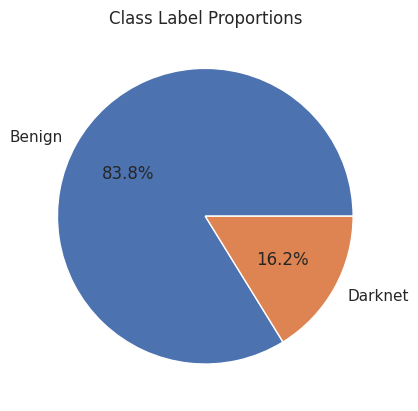

In [ ]:
plt.pie(count, labels=['Benign', 'Darknet'], autopct='%1.1f%%')
plt.title('Class Label Proportions')
plt.show()

# 2.2 Data Cleaning









## Identifying duplicate values


data.duplicated( ) shows whether there are any duplicated rows

In [ ]:

data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
141525    False
141526    False
141527    False
141528    False
141529    False
Length: 141530, dtype: bool

In [ ]:
data.loc[data.duplicated()]


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
3683,10.152.152.11-10.152.152.10-54587-53-17,10.152.152.11,54587,10.152.152.10,53,17,24/02/2016 01:59:10 PM,40796557,2,2,...,0,0,0,0,9.708910e+14,8.408160e+14,1.456340e+15,5.007594e+06,Non-Tor,Browsing
3684,10.152.152.11-54.169.125.186-54339-80-6,10.152.152.11,54339,54.169.125.186,80,6,24/02/2016 02:36:14 PM,179,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
3685,10.152.152.11-72.21.91.29-37671-80-6,10.152.152.11,37671,72.21.91.29,80,6,24/02/2016 01:53:12 PM,468,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
3686,184.72.234.198-10.152.152.11-80-58152-6,184.72.234.198,80,10.152.152.11,58152,6,24/02/2016 02:35:34 PM,12,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
3687,10.152.152.11-10.152.152.10-54275-53-17,10.152.152.11,54275,10.152.152.10,53,17,24/02/2016 02:40:12 PM,68,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118075,195.154.107.23-10.0.2.15-443-54130-6,195.154.107.23,443,10.0.2.15,54130,6,23/02/2016 06:08:49 PM,119965087,28320,14198,...,0,0,0,0,1.456270e+15,3.506598e+07,1.456270e+15,1.456270e+15,Tor,P2P
118076,195.154.107.23-10.0.2.15-443-54130-6,195.154.107.23,443,10.0.2.15,54130,6,23/02/2016 06:10:49 PM,119954055,30563,18557,...,0,0,0,0,1.456270e+15,3.461797e+07,1.456270e+15,1.456270e+15,Tor,P2P
118077,195.154.107.23-10.0.2.15-443-54130-6,195.154.107.23,443,10.0.2.15,54130,6,23/02/2016 06:12:49 PM,119952176,30723,18482,...,0,0,0,0,1.456270e+15,3.461389e+07,1.456270e+15,1.456270e+15,Tor,P2P
118078,10.0.2.15-195.154.82.180-56113-443-6,10.0.2.15,56113,195.154.82.180,443,6,23/02/2016 05:44:28 PM,244,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Tor,P2P


So by the above table we can see that there are 24457 rows that are duplicated rows, now let's analyze that a little bit more.

Because of the nature of the dataset, there are bound to be duplicate values, but we are trying to show here that those duplicate values are useful.

So we will try to find out which columns have duplicate entries. If the columns having duplicate entries have a valid reason to have duplicate values then it's all good.

So we see that 'Flow ID' feature has duplicate entries, which should not exist because Flow ID should be unique, So we are going to check it out 

In [ ]:
data.loc[data.duplicated(subset=['Flow ID'])]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
21,10.152.152.11-173.194.65.102-47874-443-6,10.152.152.11,47874,173.194.65.102,443,6,24/07/2015 04:12:25 PM,59904266,2,4,...,0,0,0,0,1.437770e+15,3.119528e+07,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
22,10.152.152.11-173.194.65.101-47698-443-6,10.152.152.11,47698,173.194.65.101,443,6,24/07/2015 04:12:26 PM,59650091,3,3,...,0,0,0,0,1.437770e+15,3.109322e+07,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
23,10.152.152.11-173.194.65.138-57457-443-6,10.152.152.11,57457,173.194.65.138,443,6,24/07/2015 04:12:40 PM,59690811,2,4,...,0,0,0,0,1.437770e+15,3.110989e+07,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
24,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:11:48 PM,119951935,304,311,...,0,0,0,0,1.437770e+15,3.563352e+07,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
25,10.152.152.11-74.125.136.120-49132-443-6,10.152.152.11,49132,74.125.136.120,443,6,24/07/2015 04:12:05 PM,104786818,4,4,...,0,0,0,0,1.437770e+15,4.157542e+07,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141418,10.8.8.246-77.72.169.133-60245-11113-17,10.8.8.246,60245,77.72.169.133,11113,17,22/05/2015 02:32:26 PM,134855,2,2,...,0,0,0,0,1.432320e+15,9.248462e+04,1.432320e+15,1.432320e+15,VPN,VOIP
141458,10.8.8.246-10.8.8.247-138-138-17,10.8.8.246,138,10.8.8.247,138,17,22/05/2015 02:28:46 PM,115015979,2,0,...,0,0,0,0,1.150160e+08,0.000000e+00,1.150160e+08,1.150160e+08,VPN,VOIP
141506,80.239.235.110-10.8.8.246-11666-60245-17,80.239.235.110,11666,10.8.8.246,60245,17,22/05/2015 02:33:23 PM,8356466,418,418,...,0,0,0,0,1.432320e+15,2.413340e+06,1.432320e+15,1.432320e+15,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


So we are seeing that 63962 duplicates are there in the dataset of 'Flow ID'.

Let's take a Flow ID and see 

In [ ]:
data.query("`Flow ID` == '10.152.152.11-173.194.65.102-47874-443-6'")

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
17,10.152.152.11-173.194.65.102-47874-443-6,10.152.152.11,47874,173.194.65.102,443,6,24/07/2015 04:10:10 PM,90104287,3,3,...,0,0,0,0,1.437770e+15,36784315.78,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
21,10.152.152.11-173.194.65.102-47874-443-6,10.152.152.11,47874,173.194.65.102,443,6,24/07/2015 04:12:25 PM,59904266,2,4,...,0,0,0,0,1.437770e+15,31195282.74,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming


This one is duplicated 2 times

Let's Check for another Flow ID

In [ ]:
data.query("`Flow ID` == '10.152.152.11-216.58.216.142-57361-443-6'")

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
7,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:09:46 PM,116996934,369,378,...,0,0,0,0,1.440000e+15,36170281.84,1.437770e+15,1.437760e+15,Non-Tor,Audio-Streaming
24,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:11:48 PM,119951935,304,311,...,0,0,0,0,1.437770e+15,35633524.44,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
37,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:13:49 PM,113515977,308,313,...,0,0,0,0,1.437770e+15,34613076.19,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
44,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:15:49 PM,118012255,303,313,...,0,0,0,0,1.437770e+15,35469851.02,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
52,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:17:49 PM,119985238,295,306,...,0,0,0,0,1.437770e+15,35078902.64,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
60,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:19:49 PM,114538912,294,303,...,0,0,0,0,1.440000e+15,34452480.30,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
68,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:21:49 PM,115147699,288,307,...,0,0,0,0,1.437770e+15,35444864.49,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
77,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:23:49 PM,118280966,296,305,...,0,0,0,0,1.440000e+15,34881838.89,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
86,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:25:49 PM,119332254,311,324,...,0,0,0,0,1.437770e+15,34475635.99,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
96,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:27:49 PM,116323317,306,312,...,0,0,0,0,1.437770e+15,34063293.32,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming


This one has 22 duplicates in terms of Flow ID.

But we can see some interesting things from this output. 

We can see that when the Flow ID is same the Src IP, Dst IP, Src Port, Dst Port, Protocol are all same but the Timestamp is different. In my understanding it is possible for two distinct network flows to exist if they have the same Src IP, Dst IP, Src Port, Dst Port, Protocol but different timestamps. 

So for a better detection of duplicate data we are going to use Flow ID and timestamp.

In [ ]:
data.loc[data.duplicated(subset=['Flow ID', 'Timestamp'])]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
302,10.152.152.11-10.152.152.10-46087-9110-6,10.152.152.11,46087,10.152.152.10,9110,6,24/07/2015 04:58:17 PM,294,1,1,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
839,10.152.152.11-23.78.109.102-44173-80-6,10.152.152.11,44173,23.78.109.102,80,6,24/02/2016 02:04:20 PM,743276,4,4,...,0,0,0,0,1.456340e+15,281062.3589,1.456340e+15,1.456340e+15,Non-Tor,Browsing
1639,10.152.152.11-216.58.193.131-56295-443-6,10.152.152.11,56295,216.58.193.131,443,6,24/02/2016 02:27:18 PM,169,3,1,...,0,0,0,0,1.456340e+15,0.0000,1.456340e+15,1.456340e+15,Non-Tor,Browsing
2100,10.152.152.11-195.138.255.11-48619-80-6,10.152.152.11,48619,195.138.255.11,80,6,24/02/2016 02:25:06 PM,135,1,1,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,Non-Tor,Browsing
2245,10.152.152.11-208.100.17.171-38815-80-6,10.152.152.11,38815,208.100.17.171,80,6,24/02/2016 02:25:08 PM,140,1,1,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,Non-Tor,Browsing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140287,50.16.198.195-10.8.8.138-443-44471-6,50.16.198.195,443,10.8.8.138,44471,6,24/05/2015 02:14:45 PM,214295,2,0,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,VPN,Video-Streaming
140289,23.21.207.234-10.8.8.138-443-46958-6,23.21.207.234,443,10.8.8.138,46958,6,24/05/2015 02:29:41 PM,213409,2,0,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,VPN,Video-Streaming
140404,10.8.8.222-178.255.83.1-61120-80-6,10.8.8.222,61120,178.255.83.1,80,6,22/05/2015 01:51:03 PM,31259,2,0,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,VPN,VOIP
140406,10.8.8.222-178.255.83.1-61122-80-6,10.8.8.222,61122,178.255.83.1,80,6,22/05/2015 01:51:03 PM,4162,2,0,...,0,0,0,0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,VPN,VOIP


So we can see that we have 26642 records with the same Flow ID (same src IP, dst IP, src port, dst port, protocol) and Timestamp. So we have to remove this data in the future.

Just to be sure, we are going to check out one record and see if it's really a duplicate.

We are going to pick the first record.

In [ ]:
data.query("`Flow ID` == '10.152.152.11-10.152.152.10-46087-9110-6' and Timestamp == '24/07/2015 04:58:17 PM'")

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
218,10.152.152.11-10.152.152.10-46087-9110-6,10.152.152.11,46087,10.152.152.10,9110,6,24/07/2015 04:58:17 PM,4181,4,4,...,0,0,0,0,1.437770e+15,1440.023386,1.437770e+15,1.437770e+15,Non-Tor,Audio-Streaming
302,10.152.152.11-10.152.152.10-46087-9110-6,10.152.152.11,46087,10.152.152.10,9110,6,24/07/2015 04:58:17 PM,294,1,1,...,0,0,0,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming


So as we can see these two data points have the same Flow ID, the same Src IP, Src port, dst port, dst ip, protocol and timestamp. So they are sure to be anomalies in the dataset and should be removed.

## Identifying missing values


In [ ]:
data.isnull()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_values = data.isna().sum()
missing_values

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

In [ ]:
missing_features = missing_values[missing_values != 0].index.tolist()
print(missing_features)

['Flow Bytes/s']


Here we can see that we have one feature with missing value which is Flow Bytes/s. Now we will see which of the rows contain missing values of Flow Bytes/s for a clearer look

In [ ]:
pd.options.display.max_columns = 90
pd.options.display.max_rows = None
missing_fb_rows = data[data['Flow Bytes/s'].isna()]
missing_fb_rows

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32902,173.194.40.103-10.152.152.11-443-52701-6,173.194.40.103,443,10.152.152.11,52701,6,22/07/2015 01:55:40 PM,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1114,2075,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,Chat
33147,2.22.9.25-10.152.152.11-443-37492-6,2.22.9.25,443,10.152.152.11,37492,6,9/7/2015 10:25,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1047,1643,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,Chat
33173,31.13.93.7-10.152.152.11-443-41051-6,31.13.93.7,443,10.152.152.11,41051,6,9/7/2015 10:25,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1047,1643,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,Chat
33323,173.194.67.16-10.152.152.11-465-35807-6,173.194.67.16,465,10.152.152.11,35807,6,13/07/2015 04:23:07 PM,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,Email
33596,173.194.207.16-10.152.152.11-465-33190-6,173.194.207.16,465,10.152.152.11,33190,6,13/07/2015 01:32:16 PM,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,8393,0,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,Email
36426,46.228.164.20-10.152.152.11-80-44537-6,46.228.164.20,80,10.152.152.11,44537,6,27/07/2015 01:36:39 PM,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,980,913,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,File-Transfer
36630,23.206.24.104-10.152.152.11-443-60982-6,23.206.24.104,443,10.152.152.11,60982,6,27/07/2015 01:42:02 PM,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1114,2008,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,File-Transfer
36640,10.152.152.11-31.13.64.1-45140-443-6,10.152.152.11,45140,31.13.64.1,443,6,27/07/2015 01:18:32 PM,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1825,1124,0,20,0,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,File-Transfer
36647,173.241.240.220-10.152.152.11-443-56194-6,173

In [ ]:
missing_fb_rows.shape

(47, 85)

So we can see that there are 47 data points that have Flow Bytes/s == NaN. We can also see that these data point have no flow duration, meaning flow duration == 0. The rows that have missing Flow Bytes/s values have other crucial features also as 0. It will be hard to replace all of these features. Also the number of rows where Flow Bytes/s is missing is 47, which is a very small percentage of values, so there won't be any problem if we just drop these rows.

#### Visualisation of missing data


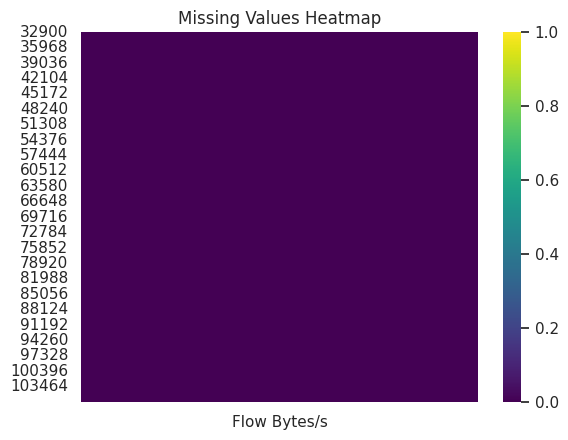

In [ ]:
sns.heatmap(data.iloc[32900:106509][['Flow Bytes/s']].isnull(),cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The missing value rows starts from 32902 and ends at 106509. As you can see the number of missing values are so less that the heatmap is blank. 

It is because there are only 47 rows missing out of the 141530 rows.

Now we will take a very small range to show you that the missing value does exist.

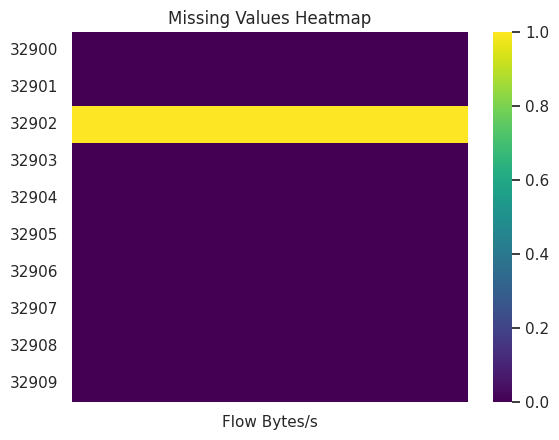

In [ ]:
sns.heatmap(data.iloc[32900:32910][['Flow Bytes/s']].isnull(),cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




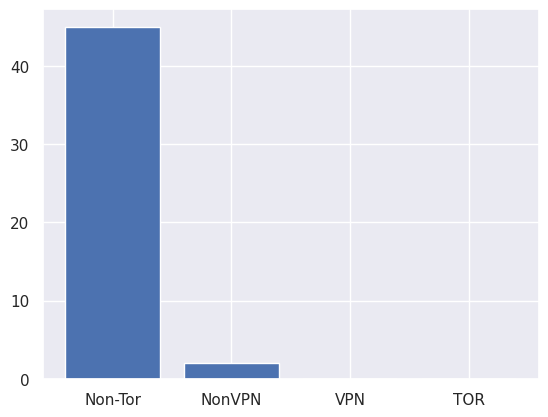

In [ ]:
nontor_missing_values = data.query("`Label` == 'Non-Tor' and `Flow Bytes/s`.isna()")
nonvpn_missing_values = data.query("`Label` == 'NonVPN' and `Flow Bytes/s`.isna()") 
vpn_missing_values = data.query("`Label` == 'Vpn' and `Flow Bytes/s`.isna()") 
tor_missing_values = data.query("`Label` == 'Tor' and `Flow Bytes/s`.isna()") 
categories = ['Non-Tor', 'NonVPN', 'VPN', 'TOR']
values = [nontor_missing_values.shape[0], nonvpn_missing_values.shape[0],vpn_missing_values.shape[0],tor_missing_values.shape[0]]

plt.bar(categories, values)
plt.show()

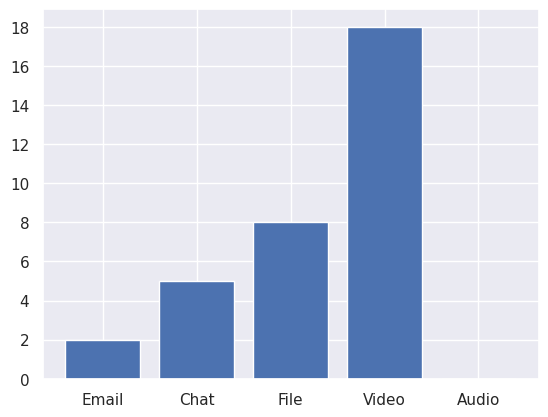

In [ ]:
email_missing = data.query("`Label.1` == 'Email' and `Flow Bytes/s`.isna()").shape[0]
chat_missing =  data.query("`Label.1` == 'Chat' and `Flow Bytes/s`.isna()").shape[0]
file_transfer_missing =  data.query("`Label.1` == 'File-Transfer' and `Flow Bytes/s`.isna()").shape[0]
video_streaming_missing =  data.query("`Label.1` == 'Video-Streaming' and `Flow Bytes/s`.isna()").shape[0]
audio_streaming_missing = data.query("`Label.1` == 'AUDIO-STREAMING' and `Flow Bytes/s`.isna()").shape[0]

categories = ['Email', 'Chat', 'File', 'Video', 'Audio']
values = [email_missing, chat_missing, file_transfer_missing, video_streaming_missing, audio_streaming_missing]
plt.yticks(range(0, 20, 2))
plt.bar(categories, values)
plt.show()

As we have only 47 rows missing out of the 141530 rows. That means we only have 0.03% of the data missing. 
The labels of the rows where the Flow Bytes/s is NaN are Non-Tor and NonVPN. And the label.1s are - chat, audio-streaming, video-streaming, email, file transfer.

Also, the rows which have Flow Bytes/s values missing have Flow Duration, Flow Packets/s, and also other important feature values equal to 0. So it will be hard to replace so many missing feature values of the rows.

So we have taken the decision to drop these rows with Flow Bytes/s == NaN

#2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

In [ ]:
data_corr = data[['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Flow Bytes/s','Flow Packets/s', 'Flow IAT Mean','Fwd PSH Flags',
    'Fwd Packets/s', 'Bwd Packets/s','Packet Length Mean',
    'Average Packet Size'
    ]].dropna().corr()
data_corr

,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Fwd PSH Flags,Fwd Packets/s,Bwd Packets/s,Packet Length Mean,Average Packet Size
Flow Duration,1.000000,0.142106,0.100285,-0.032028,-0.115725,0.447993,0.417930,-0.096983,-0.116762,0.302483,0.276062
Total Fwd Packet,0.142106,1.000000,0.744834,0.057908,-0.012155,-0.022677,0.051587,-0.010302,-0.012072,0.225830,0.213497
Total Bwd packets,0.100285,0.744834,1.000000,0.061560,-0.008269,-0.016153,0.033149,-0.007336,-0.007668,0.171404,0.162277
Flow Bytes/s,-0.032028,0.057908,0.061560,1.000000,0.301937,-0.024823,0.024633,0.394662,0.068919,0.101106,0.107462
Flow Packets/s,-0.115725,-0.012155,-0.008269,0.301937,1.000000,-0.077532,-0.026287,0.943364,0.833699,-0.097003,-0.106327
Flow IAT Mean,0.447993,-0.022677,-0.016153,-0.024823,-0.077532,1.000000,0.181287,-0.064963,-0.078249,-0.010752,-0.001897
Fwd PSH Flags,0.417930,0.051587,0.033149,0.024633,-0.026287,0.181287,1.000000,-0.003762,-0.056947,0.183390,0.181941
Fwd Packets/s,-0.096983,-0.010302,-0.007336,0.394662,0.943364,-0.064963,-0.003762,1.000000,0.603279,-0.080457,-0.087962
Bwd Packets/s,-0.116762,-0.012072,-0.007668,0.068919,0.833699,-0.078249,-0.056947,0.603279,1.000000,-0.099265,-0.109187
Packet Length Mean,0.302483,0.225830,0.171404,0.101106,-0.097003,-0.010752,0.183390,-0.080457,-0.099265,1.000000,0.993324


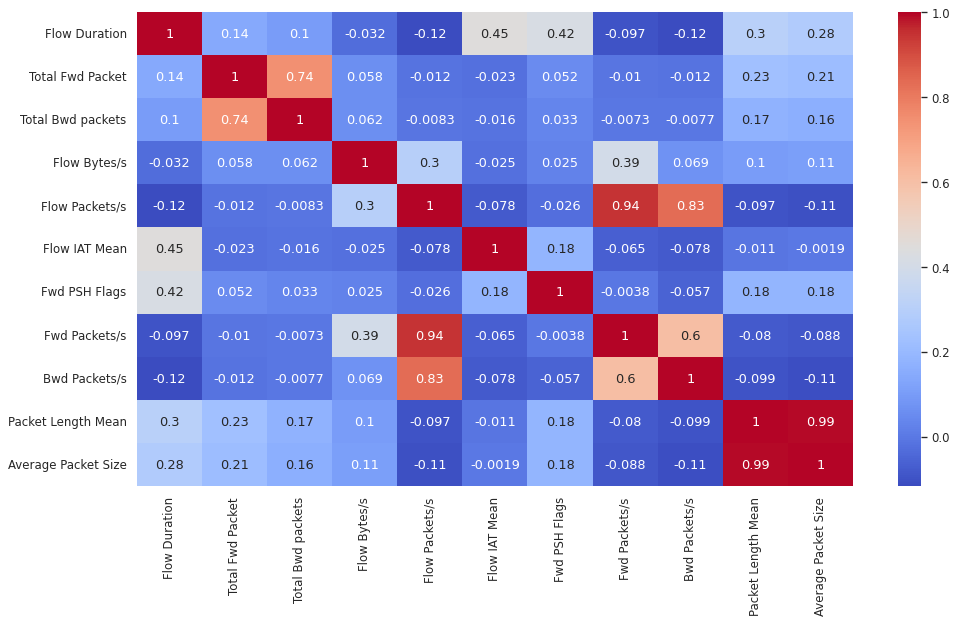

In [ ]:
plt.subplots(figsize=(15, 8), dpi=77)
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.show()

The correlation matrix gives us an idea about the correlation between different features of the dataset. A higher correlation means that the values of the feature change in the same way and a lower negative correlation means that the values of the feature change in the opposite way.

For example, there is a 0.3 correlation between Flow Bytes/s and Flow Packets/s meaning Flow packets/s increase when Flow Bytes/s increase but not in the same rate.
Again there is a negative correlation of -0.025 between Flow Bytes/s and Flow IAT mean and a negative correlation of -0.078 between Flow Packets/s and Flow IAT mean because whenever Flow Bytes/s or Flow packets/s increases Flow IAT mean decreases.
Packet Length Mean and Average Packet Size both have a positive correlation of 0.3 and 0.28 respectively with Flow Duration meaning if Flow Duration increases, these two will also increase.

In the same way we can also explain other relationships in theis correlation matrix.

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

This visualization below shows the relationship between Flow Bytes/s vs Flow Duration with respect to Label.

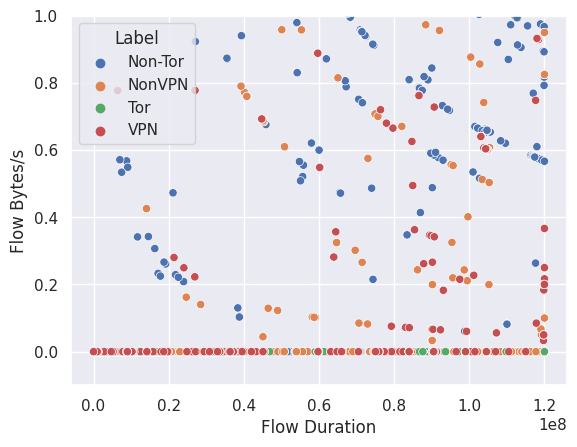

In [ ]:
sns.scatterplot(x = 'Flow Duration', y = 'Flow Bytes/s', hue = 'Label', data= data)
plt.ylim([-0.1,1.0])
plt.show()

As we can see as the Flow Duration increases, the Flow Bytes/s tend to decrease. And the Tor and VPN network flow’s Flow Bytes/s tend to decrease more than the Non-Tor or NonVPN network flows.

This visualization below shows the relationship between Flow Bytes/s and Flow Packets/s.

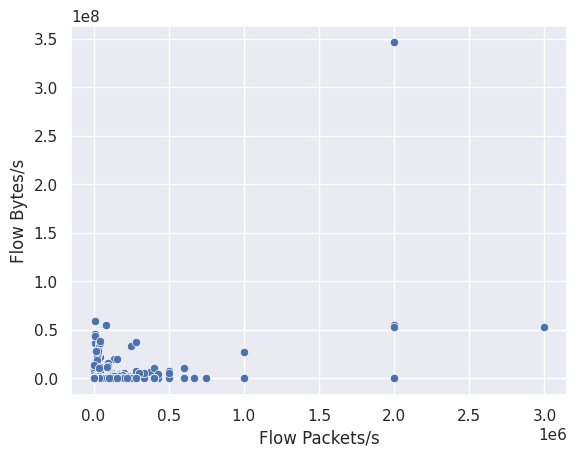

In [ ]:
sns.scatterplot(x = 'Flow Packets/s', y = 'Flow Bytes/s', data= data)
plt.show()

As Flow Bytes/s increase the Flow Packets/s also increase. But not at the same rate as Flow Bytes/s which we also saw at the correlation table.


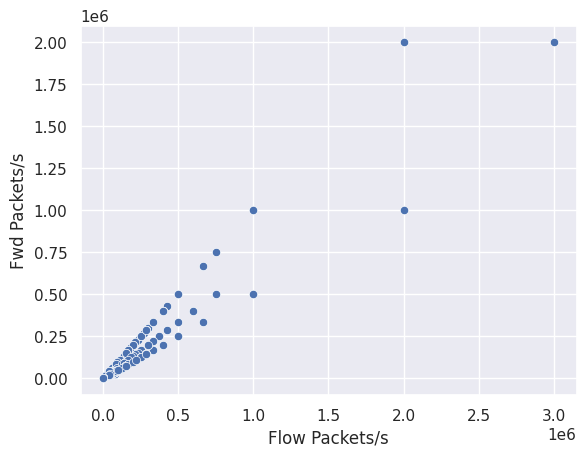

In [ ]:
sns.scatterplot(x = 'Flow Packets/s', y = 'Fwd Packets/s', data= data)
plt.show()

This visualization shows the relationship between the Flow Packets/s and Fwd Packets/s. We can see that there is an increase of Fwd Packets/s when Flow Packets/s increases. We can say the same for Bwd Packets/s and Flow Packets/s.

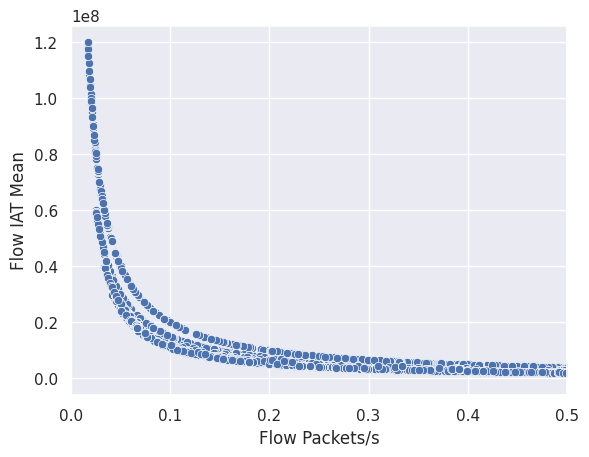

In [ ]:
sns.scatterplot(x = 'Flow Packets/s', y = 'Flow IAT Mean', data= data)
plt.xlim([0.0, 0.5])
plt.show()

This visualization shows the relationship between Flow Packets/s and Flow IAT Mean. As Flow Packets/s increases Flow IAT Mean decreases.

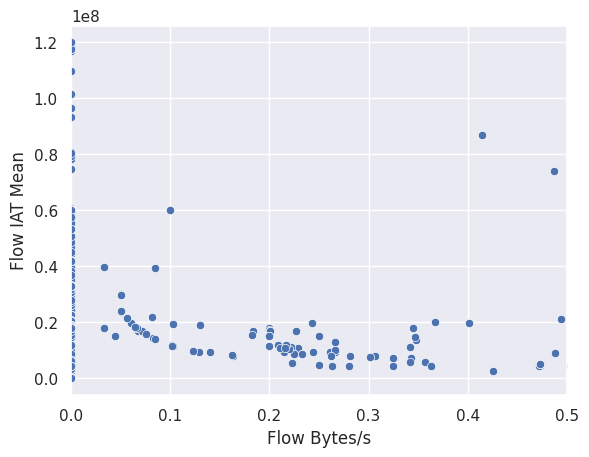

In [ ]:
sns.scatterplot(x = 'Flow Bytes/s', y = 'Flow IAT Mean', data= data)
plt.xlim([0.0, 0.5])
plt.show()

This plot shows the relationship between Flow Bytes/s and Flow IAT Mean. As we can see when Flow Bytes/s increase Flow IAT Mean tend to decrease.

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



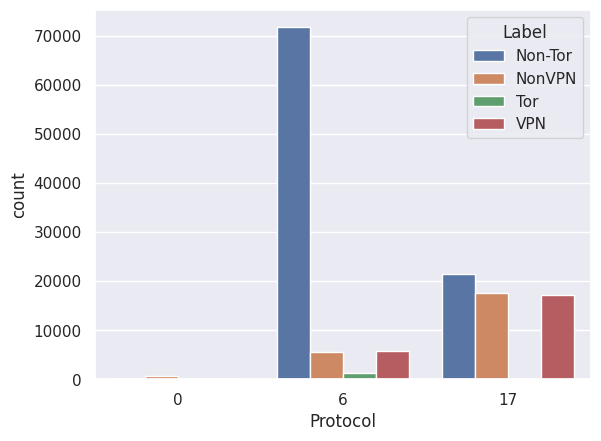

In [ ]:
sns.countplot(x = 'Protocol', hue = 'Label', data = data)
plt.show()

This bar chart shows the count of labels with respect to protocol. Here 6 means TCP and 17 means UDP. We can see that in the case of both protocols Non-Tor labels are  the majority. But in the UDP protocol, we can see an increase of NonVPN and VPN data with comparison to TCP protocol.

In [ ]:
data['Label.1'] = data['Label.1'].replace({'AUDIO-STREAMING': 'Audio-Streaming', 
                                       'File-transfer': 'File-Transfer',
                                       'Video-streaming': 'Video-Streaming'})

print(data['Label.1'].unique())

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VOIP']


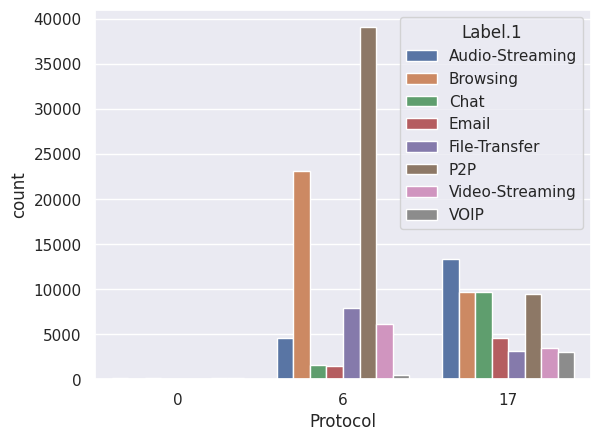

In [ ]:
sns.countplot(x = 'Protocol', hue = 'Label.1', data = data)
plt.show()

This bar chart shows the count of Label.1s with respect to protocol. We can see that TCP protocol contains the most P2P network flow with browsing being the second highest and VOIP being the lowest. While UDP has the Audio-streaming label as their highest, followed by a tie between Browsing and Chat, and the lowest is File-Transfer.

In [ ]:
avg_packet_size = data.groupby('Label.1')['Average Packet Size'].mean()
avg_packet_size

Label.1
Audio-Streaming    163.515372
Browsing            95.559864
Chat                95.625087
Email               72.814027
File-Transfer      236.343765
P2P                 69.203368
VOIP                72.597874
Video-Streaming    155.553813
Name: Average Packet Size, dtype: float64

<ipython-input-66-2c2676b3289d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Audio', 'Browsing', 'Chat', 'Email', 'File', 'P2P', 'VOIP', 'Video'])


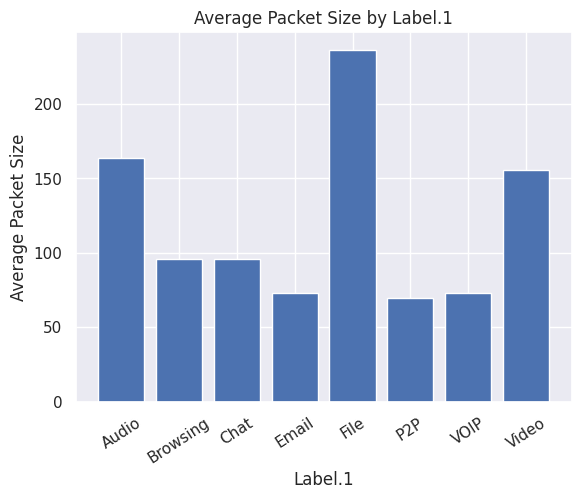

In [ ]:
plt.bar(avg_packet_size.index, avg_packet_size.values)
ax = plt.gca()
plt.title('Average Packet Size by Label.1')
plt.xlabel('Label.1')
plt.ylabel('Average Packet Size')
ax.set_xticklabels(['Audio', 'Browsing', 'Chat', 'Email', 'File', 'P2P', 'VOIP', 'Video'])
plt.xticks(rotation = 33)
plt.show()

This is a bar chart showing the average packet size of different labels. We can see that File-Transfer has the highest average packet size, and Video and Audio streaming follows next while P2P has the lowest average packet size. We can say that packet size can be a good indicator along with other features in identifying these labels.

In [ ]:
avg_IAT = data.groupby('Label')['Flow IAT Mean'].mean()
avg_IAT

Label
Non-Tor    2.753159e+06
NonVPN     3.368187e+06
Tor        1.953332e+06
VPN        1.245667e+06
Name: Flow IAT Mean, dtype: float64

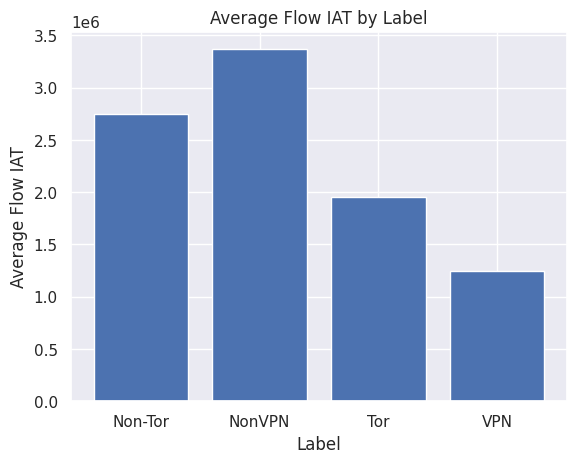

In [ ]:
plt.bar(avg_IAT.index, avg_IAT.values)
plt.title('Average Flow IAT by Label')
plt.xlabel('Label')
plt.ylabel('Average Flow IAT')
plt.show()

This bar chart shows the relationship between Average Flow IAT and Label. We can see that NonVPN has the highest Avg Flow IAT whereas Tor and VPN have lower Avg Flow IAT values. One reason for this is because TOR and VPN have less users compared to NonVPN or Non-Tor. Another reason is that there is a bot operating from the darknet.

In [ ]:
avg_PSH = data.groupby('Label')['Fwd PSH Flags'].mean()
avg_PSH

Label
Non-Tor    0.113126
NonVPN     0.045552
Tor        0.632902
VPN        0.068153
Name: Fwd PSH Flags, dtype: float64

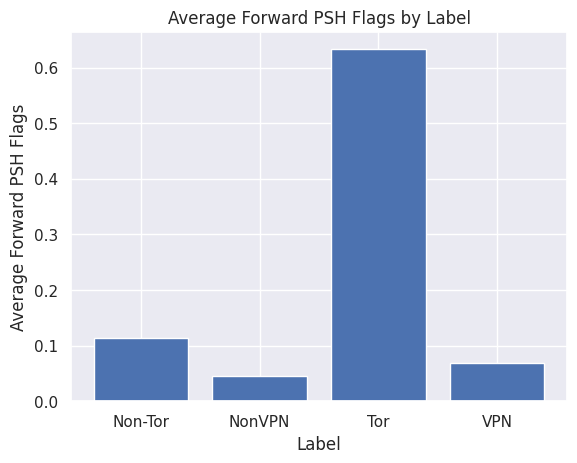

In [ ]:
plt.bar(avg_PSH.index, avg_PSH.values)
plt.title('Average Forward PSH Flags by Label')
plt.xlabel('Label')
plt.ylabel('Average Forward PSH Flags')
plt.show()

This bar chart shows the relationship between Average Forward PSH flags count and Label. We can see that TOR has the highest amount of PSH flags count, that is because TOR users are more concerned about encryption and security and they want their data delivered right away without compromise. And TOR network flows have various encryption layers and larger packet sizes containing more PSH flags.

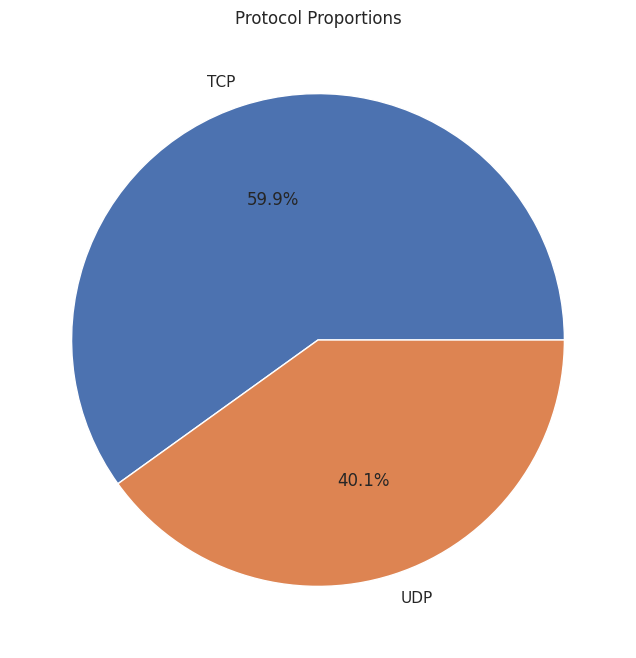

In [ ]:
tcp_count = (data['Protocol'] == 6).sum()
udp_count = (data['Protocol'] == 17).sum()
plt.figure(figsize=(8,8))
plt.pie([tcp_count, udp_count], labels=['TCP', 'UDP'], autopct='%1.1f%%')
plt.title("Protocol Proportions")
plt.show()

This is a pie-chart showing the proportions of the protocol in the dataset. As we can see, most of the data - 59.9% are from the TCP protocol and 40.1% of the data is from UDP protocol.

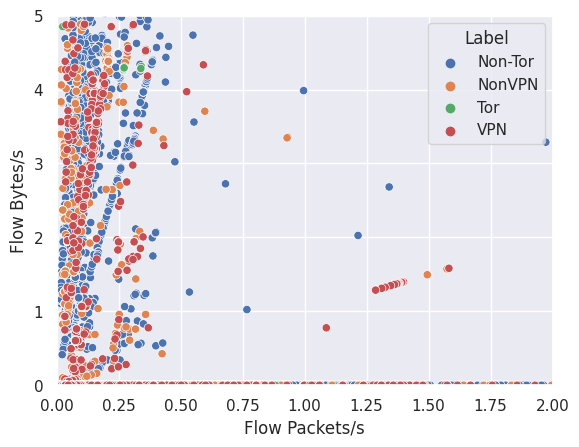

In [ ]:
sns.scatterplot(x = 'Flow Packets/s', y = 'Flow Bytes/s', hue = 'Label', data= data)
plt.xlim([0.0,2.0])
plt.ylim([0.0, 5.0])

plt.show()

This visualization shows the relationship between Flow Packets/s and Flow Bytes/s with respect to Label.

In [ ]:
pivot_table = pd.pivot_table(data, values=['Flow Duration', 'Flow IAT Mean', 'Fwd PSH Flags', 
                                           'Packet Length Mean', 'Average Packet Size'], 
                                            index=['Label.1'], aggfunc='mean')

pivot_table

,Average Packet Size,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Packet Length Mean
Label.1,,,,,
Audio-Streaming,163.515372,1.685599e+07,1.438772e+06,0.086415,121.574604
Browsing,95.559864,1.804360e+07,1.021303e+06,0.054133,88.393827
Chat,95.625087,1.518291e+07,2.527371e+06,0.048876,71.416863
Email,72.814027,1.447132e+07,2.809271e+06,0.066395,60.108120
File-Transfer,236.343765,2.139425e+07,2.978109e+06,0.044804,222.498605
P2P,69.203368,2.459903e+07,3.927243e+06,0.168261,62.289729
VOIP,72.597874,1.846769e+07,1.361516e+06,0.054403,60.215674
Video-Streaming,155.553813,2.942032e+07,3.500787e+06,0.094809,137.862666


# 3. Data Preprocessing

As per our previous discussion we can see that there exists duplicate rows in the dataset where there are rows with same Flow ID, the same Src IP, Src port, dst port, dst ip, protocol and timestamp. This type of data points can not exist. So we should remove these kind of data

In [ ]:
data = data.loc[~data.duplicated(subset=['Flow ID', 'Timestamp'])].reset_index(drop=True).copy()

In [ ]:
data.shape

(114888, 86)

As we can see that we now have 114888 rows out of 141530 rows that we had previously.

Next we are going to drop the rows that have null values. As per our discusison we have 47 rows where Flow Bytes/s is NaN. Those rows have the value 0 for other important features. So we are going to drop those rows.

In [ ]:
data.dropna(inplace=True)
missing_cleaned = data.isna().sum()
check_missing_cleaned = missing_cleaned[missing_cleaned != 0].index.tolist()
print(len(check_missing_cleaned))

0


Now we are going to search for inf values in our dataset and remove them. First we are going to create mask to see the rows that have inf values and then we are going to remove them.

In [ ]:
mask = data.isin([np.inf, -np.inf]).any(axis=1)
rows_with_inf = data[mask]
rows_with_inf

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1,Label2
35535,10.152.152.11-54.230.228.31-47339-443-6,10.152.152.11,47339,54.230.228.31,443,6,27/07/2015 01:38:59 PM,0,1,1,...,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,File-Transfer,0
63799,10.152.152.11-193.33.5.18-44696-443-6,10.152.152.11,44696,193.33.5.18,443,6,15/07/2015 11:01:30 AM,0,2,0,...,0,0,0,0.0,0.0,0.0,0.0,Non-Tor,Video-Streaming,0


In [ ]:
data.drop(index=data[data.isin([np.inf, -np.inf]).any(axis=1)].index, inplace=True)

In [ ]:
data.shape

(114839, 86)

We are going to create a new feature called Label2. This is because we are going to use logistic regression. If Label is TOR or VPN then Label2 = 1 else Label2 = 0. 1 represents Darknet traffic and 0 represents Benign traffic.

In [ ]:
data['Label2'] = np.where((data['Label'] == 'TOR') | (data['Label'] == 'VPN'), 1, 0)

Some Label.1 names are duplicate, meaning they have different naming conventions for the same label. This can hamper predictions. So we are going to fix that.

In [ ]:
data['Label.1'] = data['Label.1'].replace({'AUDIO-STREAMING': 'Audio-Streaming', 
                                       'File-transfer': 'File-Transfer',
                                       'Video-streaming': 'Video-Streaming'})

print(data['Label.1'].unique())

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VOIP']


Now we are going to count the number of benign and darknet traffic in the dataset and create a pie chart.

In [ ]:
counts = data['Label2'].value_counts()
print("Number of 0s (Benign Traffic):", counts[0])
print("Number of 1s (Darknet Traffic):", counts[1])

Number of 0s (Benign Traffic): 92385
Number of 1s (Darknet Traffic): 22454


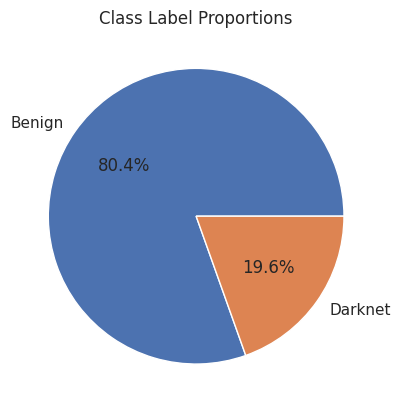

In [ ]:
plt.pie(counts, labels=['Benign', 'Darknet'], autopct='%1.1f%%')
plt.title('Class Label Proportions')
plt.show()

As we can see that, our dataset is imbalanced. To tackle this imbalance, we are going to oversample our minority set, that is we are going to increase the number of samples for darknet traffic and make them equal to the number of benign traffic.

In [ ]:
benign_data = data[data['Label2']==0]
darknet_data = data[data['Label2']==1]


In [ ]:
benign, darknet = counts[0], counts[1]
print(benign, darknet)

92385 22454


In [ ]:
darknet_data_over = darknet_data.sample(benign, replace = True)

In [ ]:
darknet_data_over.shape

(92385, 86)

Now we are going to concat our benign data dataframe and our darknet data oversample dataframe and create a new dataframe called new_data

In [ ]:
new_data = pd.concat([benign_data, darknet_data_over], axis = 0)
new_data.shape

(184770, 86)

As we can see we have equal numbers of darknet and benign traffic now.

In [ ]:
print(new_data.Label2.value_counts())

0    92385
1    92385
Name: Label2, dtype: int64


In [ ]:
new_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1,Label2
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,0
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,0
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,0
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming,0
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,Audio-Streaming,0


Now we are creating X by dropping the three label columns.

In [ ]:
X = new_data.iloc[:,:-3]
X

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,581,20,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107781,10.8.8.130-78.46.223.24-37278-53-17,10.8.8.130,37278,78.46.223.24,53,17,3/6/2015 16:54,134227,1,1,...,0,8,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00
97944,10.8.0.14-131.202.244.5-33781-53-17,10.8.0.14,33781,131.202.244.5,53,17,14/04/2015 05:50:49 PM,683,1,1,...,0,8,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00
112059,10.8.8.130-129.98.43.99-56673-24011-6,10.8.8.130,56673,129.98.43.99,24011,6,5/6/2015 11:33,8405065,7,3,...,2,32,0,0,0,0,1.433510e+15,3084341.834,1.433510e+15,1.433510e+15
94066,10.8.0.10-131.202.244.5-19691-53-17,10.8.0.10,19691,131.202.244.5,53,17,14/04/2015 05:08:02 PM,704,1,1,...,0,8,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00


In [ ]:
X.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

Dropping Object features from the X because they are not needed now.

In [ ]:
X.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port','Timestamp'], axis = 1, inplace = True)


In [ ]:
X.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count',

Creating y with Label2

In [ ]:
y = new_data.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
107781    1
97944     1
112059    1
94066     1
102721    1
Name: Label2, Length: 184770, dtype: int64

Now we are going to do Principal Component Analysis (PCA) to reduce the dimensionality of our dataset.

First we are going to scale the values of our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.13500612, -0.48589163, -0.06935197, ..., -0.23459808,
        -0.79228442, -0.68974582],
       [-1.13500612, -0.48588676, -0.06935197, ..., -0.23459808,
        -0.79228442, -0.68974582],
       [-1.13500612, -0.4858861 , -0.06935197, ..., -0.23459808,
        -0.79228442, -0.68974582],
       ...,
       [-1.13500612, -0.25580764, -0.0661893 , ..., -0.23459806,
         1.24705322,  1.43475275],
       [ 0.86573446, -0.48587863, -0.06935197, ..., -0.23459808,
        -0.79228442, -0.68974582],
       [ 0.86573446, -0.48587953, -0.06935197, ..., -0.23459808,
        -0.79228442, -0.68974582]])

Now we are going to apply PCA.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X_scaled)

X shape before and after PCA

In [ ]:
X_scaled.shape

(184770, 77)

In [ ]:
X_pca.shape

(184770, 26)

Now we are going to split the datasets into test_train split.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [ ]:
X_train

array([[-2.21493279,  0.67704152,  0.07726374, ..., -0.02575041,
        -0.22131636,  0.20202077],
       [-2.54955961, -0.22608097,  0.88718485, ...,  0.36392953,
        -0.30987281, -0.0353643 ],
       [-1.79334995,  1.71476866, -0.79396628, ..., -0.01655353,
         0.08882471, -0.17752665],
       ...,
       [ 3.216801  ,  2.48953505, -3.37846809, ..., -0.10059526,
        -0.76301954,  0.03262829],
       [-1.74699979,  1.88708761, -0.91152436, ..., -0.01886023,
         0.14933545, -0.22123685],
       [ 7.63128864, -0.41147954, -1.84714893, ...,  0.08602153,
        -0.59933019,  0.33190193]])

In [ ]:
X_train.shape

(129339, 26)

In [ ]:
y_train.head()

95556     1
114684    1
97951     1
102834    1
13717     0
Name: Label2, dtype: int64

In [ ]:
y_train.shape

(129339,)

In [ ]:
X_test

array([[-2.07288941,  1.05278007, -0.23082321, ...,  0.00636819,
        -0.13477475,  0.0433628 ],
       [-2.39884282,  0.06507733,  0.56765228, ..., -0.08494485,
        -0.39483151,  0.50412117],
       [-0.79874664, -1.26740284,  0.91581436, ...,  0.18241838,
         0.54845213, -0.3022165 ],
       ...,
       [-1.92877445, -0.56210318,  0.72964578, ..., -0.41566157,
         0.33003604,  0.30345785],
       [ 2.32134208, -3.04585068,  0.93616299, ..., -0.75006375,
         0.86657035,  0.24160482],
       [ 4.02418362, -1.92685471, -0.18690353, ..., -0.31468849,
        -0.54632454,  0.16389415]])

In [ ]:
X_test.shape

(55431, 26)

In [ ]:
y_test.head()

107137    1
110114    1
63444     0
15597     0
56441     0
Name: Label2, dtype: int64

In [ ]:
y_test.shape

(55431,)


Data Preprocessing is a very important step to prepare the dataset for the model training.
In this stage -
*   We removed the null values in the Flow Bytes/s feature,
*   We removed duplicate rows where the Flow ID and Timestamp is the same, 
*   We removed rows that had features with inf values.
*   We had a Label column where the labels were - Non-Tor, Tor, VPN, NonVPN. So we created another feature called Label2 where if the Label is Non-Tor or NonVPN we categorize it as Benign and put value as 0 in the Label2 and if it is VPN or Tor we categorize it as Darknet and put value as 1.
*   Some of the labels in Label.1 are duplicate meaning they have default naming conventions. So we changed that.
*   Then we had to take some steps as our dataset was imbalanced. First we created two dataframes named benign_data containing Label2==0 datapoints meaning bengin traffic flows, and darknet_data containing Label2==1 datapoints meaning darknet traffic flows.
*   Our majority class was benign data having 92385 samples and our minority class was darknet data having 22454 samples. So we decided to oversample our minority class by making its size equal to our majority sample. So we did that and stored it into darknet_data_over variable.
*   After that, we concatenated the benign_data and darknet_data_over and created a new datafram called new_data.
*   Then we created X and y. For X we took all of the features except the last three features as they were all label columns and for y we took the last column.
*   Then we dropped the categorical variables from the X that were not needed for prediction.
*   Then we scaled all of the data point in X. Scaling is an important step to achieve high accuracy score.
*   Then we did Principal Component Analysis (PCA) on our X. As our X contained 77 features meaning it was a high dimensional dataset. Predicting on a high dimensional dataset with high accuracy is tough for any ML model. PCA helps us reduce the dimensionality of our dataset while preserving the variance and information of our dataset. So  PCA is another very important step in data preprocessing. The number of features reduced to 26 from 77 which is a great reduction.
*   Then we split our dataset into test and train sets. We did a 70/30 split and we also set the random_state for reproducibility of the same random dataset each time.


# 4.	Machine Learning Models

## Decision Tree Classifier

We are going to use decision tree classifier model for predicting the Network Flow type

#### Decision Tree -
Decision Tree classifier is a classification ML model. It is a supervised model and can be used for both categorical and numerical variables. It is based on a tree structure. The model breaks the dataset into subsets and keeps breaking it until there is nothing left and at that point we are at the leaf node and the model outputs a class.

The feature that is going to be the root node is determined by the feature that has the lowest gini impurity value.

#### Decision Tree Parameters -


*   Criterion: This measures how pure or impure the split in the node is. We can use 'gini impurity' or 'Entropy' for this. By default it is set to 'gini'.
*   Splitter: How is the split made at each node or the strategy used to make the split at each node. We can use 'best' or 'random'. I have used 'best'. The 'random' split decreases accuracy of my model.
*   max_depth: this specifies the maximum depth of the tree. Increasing the depth might cause overfitting. But having a lower value might cause underfitting.
*   max_leaf_nodes: This specifies the maximum number of leaf nodes the tree can have. Higher values can lead to more tree nodes, generating a complex model and overfitting while lower values can lead to underfitting.
*   min_samples_split: this specifies the minimum number of samples required for a node to split. If I increase the value of this parameter, the total number of samples needed for a node to split will increase and this can prevent the model from overfitting.
*   min_samples_leaf: this specifies the minimum number of samples needed for a node for it to be a leaf node. This can also prevent overfitting.
*   random_state: This is the seed for randomness and it ensures reporducability meaning that it will choose the same random values everytime we run. This helps with debugging and checking the output.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_score_1 = dtc.score(X_test, y_test)

In [ ]:
dtc_score_1

0.9825368476123468

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 0, 1, 0])

### Parameter Tuning for Decision Tree

In [ ]:
tuned_dtc = DecisionTreeClassifier(random_state=42, splitter = 'best', max_depth = 15, max_leaf_nodes = 83, min_samples_leaf = 84, min_samples_split = 5)
tuned_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=83, min_samples_leaf=84,
                       min_samples_split=5, random_state=42)

In [ ]:

print("Accuracy on test data for Label:", tuned_dtc.score(X_test, y_test))

Accuracy on test data for Label: 0.9283974671212859


In [ ]:
tuned_y_pred = tuned_dtc.predict(X_test)
tuned_y_pred

array([1, 1, 0, ..., 0, 1, 0])

## Logistic Regression

#### Logistic Regression -
It is a supervised classification ML model and it is used for binary classification. It finds the relationship between the dependent variable (the target variable) and the independent variables (the features). 

It transforms the linear combinations of the independent features into a probability score of 0 to 1.

Linear Combinations mean multiplying the values with weights or coefficients and adding them all up to produce the log-odds, z

From z we can find out the probability P.

#### Parameters -

*   Penalty: This specifies what kind of regularization algorithm would be applied to the model. Regualarization determines what the coefficients would be. By default the model has L2 regularization which reduces the coefficient values of non-important features but the coefficient values are never zero. L1 regualarization reduces the coefficient values of non-important features and the coefficient value can be zero. L1 regularization creates a sparse model where there are very few features with non-zero coefficients. This is helpful for large number of features.
*   C: This specifies the strength of the regularization. Lower value means more strength, higher value means less strength. By default the value is 1.0
*   Solver: This parameter specifies the optimization algorithm to be used to find the coefficients that minimize the loss function. There are several solvers available, including "liblinear", "newton-cg", "lbfgs", "sag", and "saga". The default is "lbfgs".
*   Max_iter: This parameter specifies the maximum number of iterations for the solver to converge. The default is 100.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
lr_score_1 = model.score(X_test, y_test)

In [ ]:
lr_score_1

0.803052443578503

In [ ]:
reg_pred = model.predict(X_test)
reg_pred

array([1, 0, 0, ..., 0, 0, 1])

### Paramter Tuning for Logistic Regression

In [ ]:
tuned_lr = LogisticRegression(max_iter = 5000, penalty = 'l1', solver = 'saga')

In [ ]:

tuned_lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty='l1', solver='saga')

In [ ]:
lr_score_2 = tuned_lr.score(X_test, y_test)
lr_score_2

0.802186502137793

In [ ]:
tuned_reg_pred = tuned_lr.predict(X_test)
tuned_reg_pred

array([1, 0, 0, ..., 0, 0, 1])


We used two models to predict for our dataset - Decision Tree and Logistic Regression. First we used Decision Tree.

### Decision Tree


Decision tree is supervised classification ML model. It has a tree-like structure where each node holds a test on an attribute or feature of the dataset and each branch represents the outcome of the test and each leaf node represents a class label.


The parameters that we are going customize for our decision tree model is max_depth, max_leaf_nodes, min_samples_leaf, min_samples_split, splitter.

*   We used decision tree to predict Benign vs Darkent traffic. Accuracy score - 0.98

Now we are going to change its parameter. The best hyperparamters for predicting Label in Decision Tree is - 'max_depth': 15, 'max_leaf_nodes': 83, 'min_samples_leaf': 84, 'min_samples_split': 5

*   With the tuned up model, we again predict the benign and darknet traffic flows, accuracy score - 0.92

### Logistic Regression

Logistic Regression is a supervised classification ML model and it is used for binary classification. It finds the relationship between the dependent variable (the target variable) and the independent variables (the features).
The parameters that we customized for our logistic regression model is - max_iter, penalty, C, solver.

*   First we used default parameter logistic regression to predict benign vs darknet traffic. Accuracy Score - 0.80
*   After that we changed up the parameter of the Logistic Regression model and predicted benign vs darknet traffic
tuned_lr = LogisticRegression(max_iter = 5000, penalty = 'l1', solver = 'saga').
Accuracy Score - 0.80

Among the two models, it seems that decision tree performed better while predicting Darknet vs Benign Traffic.

We will analyze the results more in the performance evaluation part.





# 5.	Performance Evaluation and Discussion

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

##### Decision Tree with Default Parameter

Perfomance Evaluation on predicion of  target variable - Label2

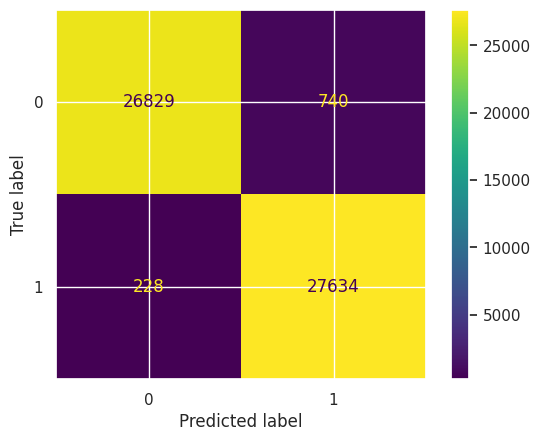

In [ ]:
cm_dtc = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm_dtc,display_labels=dtc.classes_)
display.plot()
plt.show()

In [ ]:
target_names = ['Benign', 'Darknet']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98     27569
     Darknet       0.97      0.99      0.98     27862

    accuracy                           0.98     55431
   macro avg       0.98      0.98      0.98     55431
weighted avg       0.98      0.98      0.98     55431



In [ ]:
dtc_dark_f1 = f1_score(y_test, y_pred, average='weighted')
print('f1 score of Darknet:', dtc_dark_f1)

f1 score of Darknet: 0.9825345045995397


In [ ]:
dtc_bias = np.mean((y_test - np.mean(y_pred))**2)
dtc_bias

0.25007833173275024

In [ ]:
dtc_variance = np.var(y_pred)
dtc_variance

0.2498588742927059

##### Decision Tree with tuned parameters

Perfomance Evaluation on predicion of  target variable - Label2

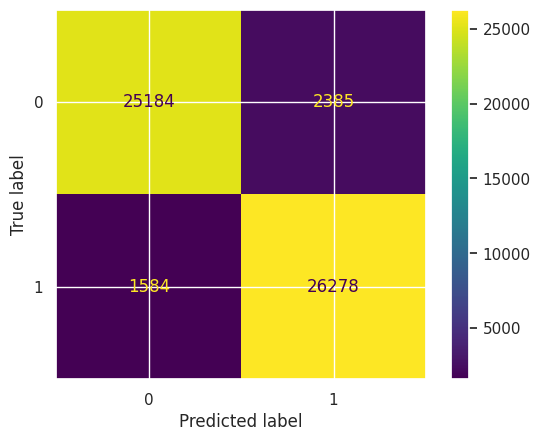

In [ ]:
cm_dtc = confusion_matrix(y_test, tuned_y_pred, labels=tuned_dtc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm_dtc,display_labels=tuned_dtc.classes_)
display.plot()
plt.show()

In [ ]:
target_names = ['Benign', 'Darknet']
print(classification_report(y_test, tuned_y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.94      0.91      0.93     27569
     Darknet       0.92      0.94      0.93     27862

    accuracy                           0.93     55431
   macro avg       0.93      0.93      0.93     55431
weighted avg       0.93      0.93      0.93     55431



In [ ]:
tuned_dtc_dark_f1 = f1_score(y_test, tuned_y_pred, average='weighted')
print('f1 score of Darknet:', tuned_dtc_dark_f1)

f1 score of Darknet: 0.9283770383617928


In [ ]:
tuned_dtc_bias = np.mean((y_test - np.mean(tuned_y_pred))**2)
tuned_dtc_bias

0.2502018289414674

In [ ]:
tuned_dtc_variance = np.var(tuned_y_pred)
tuned_dtc_variance

0.2497078183009314

##### Logistic Regression with default parameters

Perfomance Evaluation on predicion of  target variable - Label2

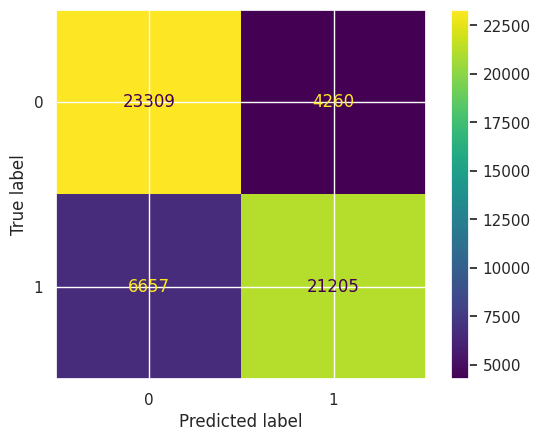

In [ ]:
cm_lr = confusion_matrix(y_test, reg_pred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
target_names = ['Benign', 'Darknet']
print(classification_report(y_test, reg_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.78      0.85      0.81     27569
     Darknet       0.83      0.76      0.80     27862

    accuracy                           0.80     55431
   macro avg       0.81      0.80      0.80     55431
weighted avg       0.81      0.80      0.80     55431



In [ ]:
lr_dark_f1 = f1_score(y_test, reg_pred, average='weighted')
print('f1 score of Darknet:', lr_dark_f1)

f1 score of Darknet: 0.8027287119764513


In [ ]:
lr_bias = np.mean((y_test - np.mean(reg_pred))**2)
lr_bias

0.2518629677299748

In [ ]:
lr_variance = np.var(reg_pred)
lr_variance

0.24835163794916143

##### Logistic Regression with tuned parameters

Perfomance Evaluation on predicion of  target variable - Label2

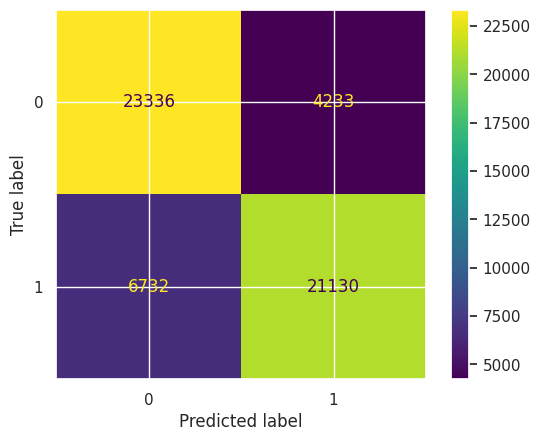

In [ ]:
cm_tuned_lr = confusion_matrix(y_test, tuned_reg_pred, labels=tuned_lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lr,display_labels=tuned_lr.classes_)
display.plot()
plt.show()

In [ ]:
target_names = ['Benign', 'Darknet']
print(classification_report(y_test, tuned_reg_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.78      0.85      0.81     27569
     Darknet       0.83      0.76      0.79     27862

    accuracy                           0.80     55431
   macro avg       0.80      0.80      0.80     55431
weighted avg       0.80      0.80      0.80     55431



In [ ]:
tuned_lr_dark_f1 = f1_score(y_test, tuned_reg_pred, average='weighted')
print('f1 score of Darknet:', tuned_lr_dark_f1)

f1 score of Darknet: 0.8018310258396572


#### F1-Score comparison predicting benign vs darknet traffic of both models using default parameters

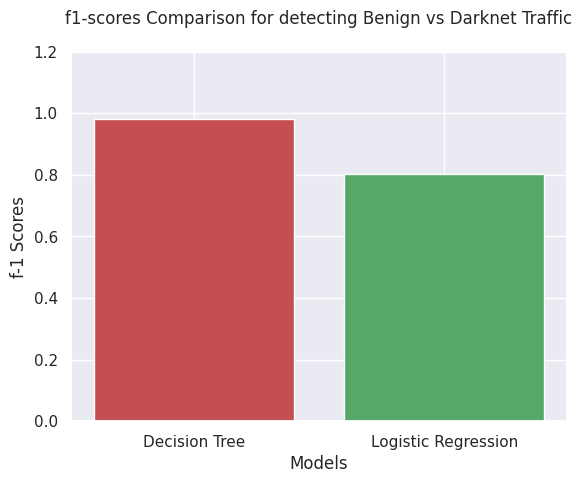

In [ ]:
models = ['Decision Tree', 'Logistic Regression']
scores = [dtc_dark_f1, lr_dark_f1]
plt.bar(models, scores, color=['r', 'g'])
plt.title('f1-scores Comparison for detecting Benign vs Darknet Traffic',pad=20)
plt.xlabel('Models')
plt.ylabel('f-1 Scores')
plt.ylim(0, 1.2)
plt.show()

#### F1-Score comparison predicting benign vs darknet traffic of both models using tuned parameters

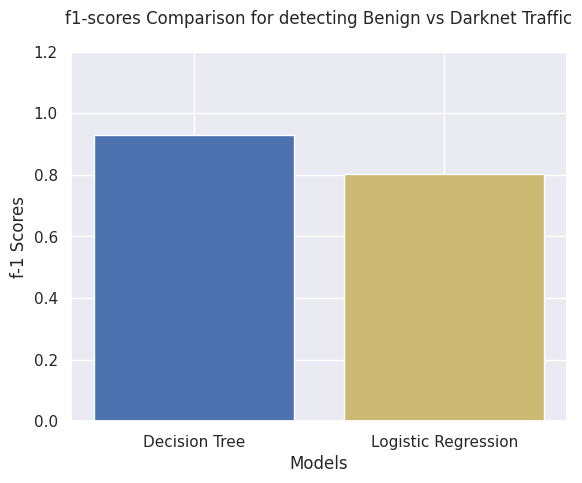

In [ ]:
models = ['Decision Tree', 'Logistic Regression']
scores = [tuned_dtc_dark_f1, tuned_lr_dark_f1]
plt.bar(models, scores, color=['b', 'y'])
plt.title('f1-scores Comparison for detecting Benign vs Darknet Traffic',pad=20)
plt.xlabel('Models')
plt.ylabel('f-1 Scores')
plt.ylim(0, 1.2)
plt.show()

Bias Comparison between the two models using default parameters

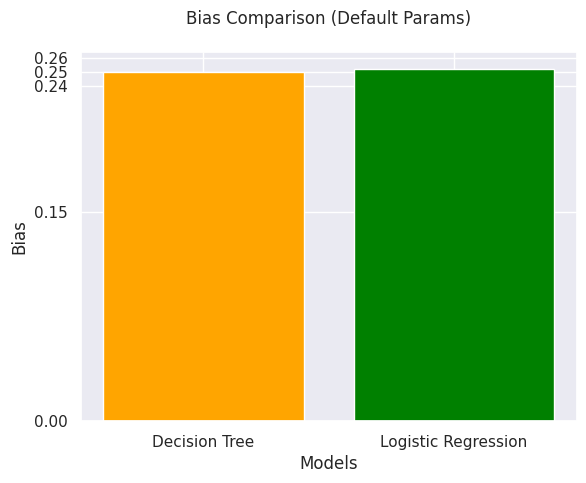

In [ ]:
models = ['Decision Tree', 'Logistic Regression']
scores = [dtc_bias, lr_bias]
plt.bar(models, scores, color=['orange', 'green'])
plt.title('Bias Comparison (Default Params)',pad=20)
plt.xlabel('Models')
plt.ylabel('Bias')
plt.yticks([0.0, 0.15, 0.24, 0.25, 0.26])
plt.show()

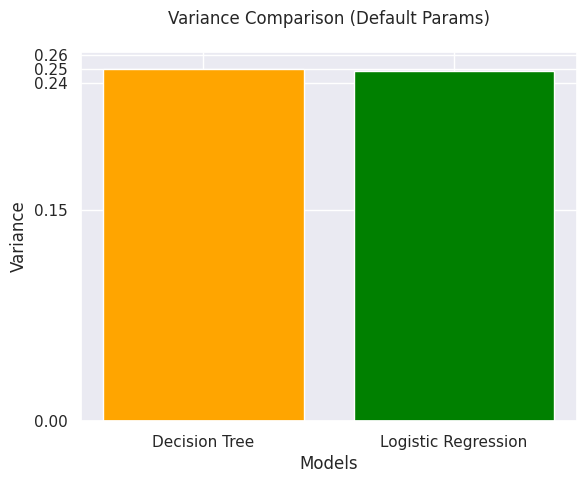

In [ ]:
models = ['Decision Tree', 'Logistic Regression']
scores = [dtc_variance, lr_variance]
plt.bar(models, scores, color=['orange', 'green'])
plt.title('Variance Comparison (Default Params)',pad=20)
plt.xlabel('Models')
plt.ylabel('Variance')
plt.yticks([0.0, 0.15, 0.24, 0.25, 0.26])
plt.show()


First we will decide which performance metric is the most appropriate for this problem. As this is a Darknet Traffic Detection Model, it is important that we do not predict an actual darknet traffic as benign (minimizing False Positive) and it is also important that we do not predict an actual benign traffic as darknet (minimizing False Negative). 

So we can see that both Precision and Recall scores are important for our model. So we will use F1-Score as our appropriate performance metric as F1-Score is the harmonic mean of Precision and Recall.

**Decision Tree**

Default Parameters -


With the default parameter decision tree model, we had 
F1-score (Benign) - 0.98, F1-Score (Darknet) - 0.98, Accuracy - 0.98.

The bias and variance of this model is 0.250, 0.249 respectively. 

Tuned Parameters - 
F1-score (Benign) - 0.93, F1-Score (Darknet) - 0.93, Accuracy - 0.93.
The bias and variance of this model is 0.250, 0.249 respectively.

The low bias and low variance of the model, along with the model being a decision tree, enabled it to perform exceptionally on the test set after training it on the training set. The good F1-score for both the darknet and benign traffic flow proves that the model performed well for both the classes. And the low bias and low variance shows that the model is not overfitted or underfitted.

**Logistic Regression**

Default Parameters -

F1-score (Benign) - 0.81, F1-Score (Darknet) - 0.80, Accuracy - 0.80.


The bias and variance of this model is 0.251, 0.248 respectively. 

Tuned Parameters -

F1-score (Benign) - 0.81, F1-Score (Darknet) - 0.79, Accuracy - 0.80.

The logistic regression model also performed well on the test set. With an F1-Score of 0.81 and 0.80 with the default paramter for benign and darknet class respectively. The model also had low bias and low variance which meant that the model was not overfitted or underfitted.

However the logistic regression model did not perform as good as the decision tree model.
We all know that the decision tree model is a better classifier than the logistic regression. It is a more complex classifier and generates a complex model. Also in this case, the decision tree had a lower bias than the logistic regression model, meaning the decision tree fitted the model a bit better than the logistic regression. I think because of these resasons, the decision tree performed better than the logistic regression model.
